<h1>Мини-проект</h1>

1 - 2. Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.  
<b>Вопрос:</b> сколько в датасете пропущенных значений?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/OoOH0Nl8Q2RYGw")

In [3]:
df.shape

(5315, 3)

In [5]:
df.dtypes

date           object
name           object
transaction    object
dtype: object

In [7]:
df.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [26]:
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [10]:
# Число пропущенных значений:
df.isna().sum()

date           0
name           0
transaction    0
dtype: int64

3. Проверьте, какие значения принимает колонка <b>transaction</b>. Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.  
<b>Вопрос:</b> расположите уровни переменной в порядке убывания числа относящихся наблюдений (от большего к меньшему)

In [16]:
statuses_df = df.groupby("transaction", as_index = False) \
                .agg({"date" : "count"}) \
                .rename(columns = {"date" : "number_of_statuses"})

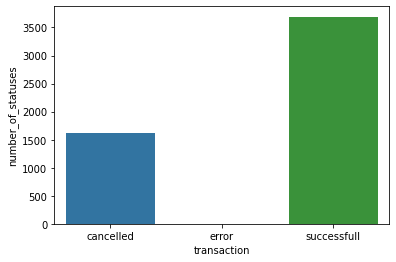

In [19]:
ax = sns.barplot(x = statuses_df.transaction, y = statuses_df.number_of_statuses, data = statuses_df)

4. Подумайте, хорош ли полученный график?

<b>Ответ:</b> Нет, т.к. не видно числа ошибок

5. Сколько произошло ошибок?

In [25]:
statuses_df.sort_values("number_of_statuses").head(1)

,transaction,number_of_statuses
1,error,4


6. Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением <b>successfull</b>

Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где  
* по оси x – число транзакций
* по оси y – доля пользователей с таким числом транзакций

In [30]:
successfull_users = df.query("transaction == 'successfull'") \
                      .groupby("name", as_index = False) \
                      .agg({"date" : "count"}) \
                      .rename(columns = {"date" : "transactions"})

In [31]:
successfull_users["rate_of_users"] = successfull_users.transactions / successfull_users.transactions.sum()

In [42]:
successfull_users = successfull_users.drop("rate_of_users", axis = "columns")

In [46]:
tmp_df = successfull_users.groupby("transactions", as_index = False) \
                 .agg({"name" : "count"})

In [47]:
tmp_df["rate_of_users"] = tmp_df.name / tmp_df.name.sum()

In [58]:
tmp_df.transactions.quantile(q = 0.25)

59.5

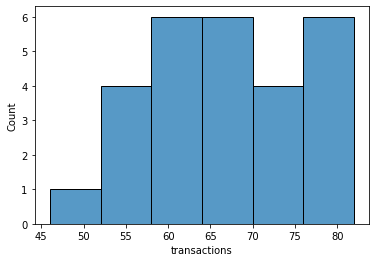

In [54]:
ax = sns.histplot(tmp_df.transactions)

7. К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где


* столбцы – имена пользователей
* строки – минута времени осуществления операции (minute)
* значения – число совершённых операций

Пропущенные значения заполните нулями.

In [84]:
new_df = pd.read_csv("https://stepik.org/media/attachments/lesson/361624/transaction_data_updated.csv")

In [61]:
new_df

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [68]:
users = new_df.groupby(["name", "minute"], as_index = False) \
              .agg({"transaction" : "count"})

In [69]:
users

,name,minute,transaction
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3
...,...,...,...
2573,Vasilisa_Smirnova,52,1
2574,Vasilisa_Smirnova,53,1
2575,Vasilisa_Smirnova,54,2
2576,Vasilisa_Smirnova,56,3


In [70]:
user_vs_minute_pivot = users.pivot(index = "minute", columns = "name", values = "transaction")

In [73]:
user_vs_minute_pivot = user_vs_minute_pivot.fillna(0)

In [75]:
user_vs_minute_pivot

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,3.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0


8. Коллега построил следующий график по сводной таблице из предыдущего шага, и сомневается, что в данных нет ошибки.

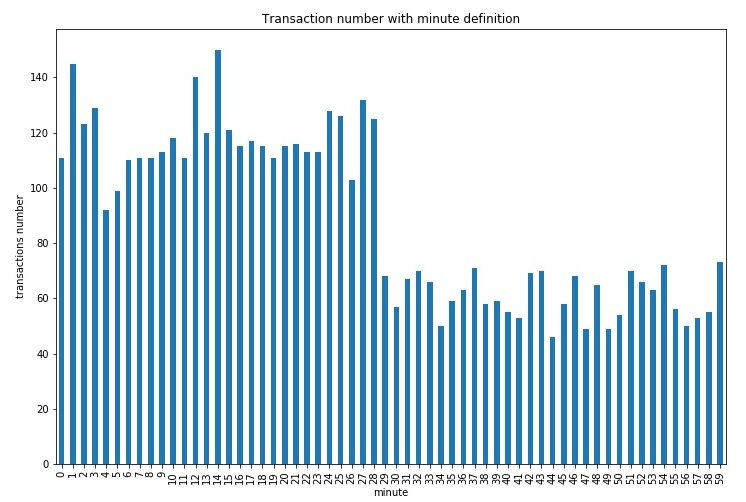

* по оси x – минута транзакции (сколько минут прошло с начала дня)
* по оси y – число транзакций

Как вы думаете, из-за чего мы видим такую картину? Произошла ошибка, или с данными всё хорошо?

<b>Ответ:</b> Извлекли минутную часть времени, а не число минут с начала дня

9. Исправьте ошибку коллеги (если она есть 😉), и посчитайте число минут, прошедших с начала дня. Результат сохраните в колонку true_minute. Постройте график, как в предыдущем шаге, и посмотрите, произошли ли изменения (график в код включать не нужно).

In [94]:
new_df["date"] = pd.to_datetime(new_df.date)

In [95]:
new_df["true_minute"] = new_df.date.dt.hour * 60 + new_df.date.dt.minute

In [96]:
new_df

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13


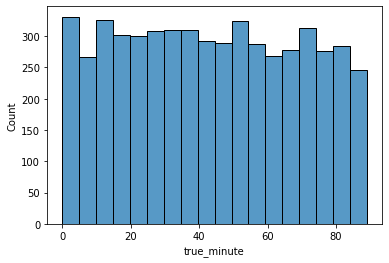

In [98]:
ax = sns.histplot(new_df.true_minute)